# First explorations of helicopter fast data
#### Brian Mapes, Oct 5 2023
#### Goal: understand basic character of instruments and data 
### Especially vertical wind (key to all fluxes) 
### Use redundancy of two systems to find strengths 
#### or find weaknesses, in hopes to filter them out

In [1]:
# Packages and open datafile

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 

In [59]:
df = pd.read_excel('/Users/bmapes/Downloads/Flight_2023-06-23_F_segmented_Legs.xlsx')
df = df[1:] # strip off row of units strings

In [61]:
pd.options.display.max_columns = None  # unlimited column display
df

,TIMESTAMP,latitude,longitude,speed,course,altitude,altitude in Feet,Ux1,Uy1,Uz1,Ts1,CO21,H2O1,cell_tmpr1,cell_press1,Ux2,Uy2,Uz2,Ts2,CO22,H2O2,cell_tmpr2,cell_press2,Ux1',Uy1',Uz1',Ts1',CO21',H2O1',cell_tmpr1',cell_press1',Ux2',Uy2',Uz2',Ts2',CO22',H2O2',cell_tmpr2',cell_press2',Ux1' * Ux1',Ux1' * Uy1',Ux1' * Uz1',Ux1' * Ts1',Ux1' * CO21',Ux1' * H2O1',Ux1' * cell_tmpr1',Ux1' * cell_press1',Uy1' * Uy1',Uy1' * Uz1',Uy1' * Ts1',Uy1' * CO21',Uy1' * H2O1',Uy1' * cell_tmpr1',Uy1' * cell_press1',Uz1' * Uz1',Uz1' * Ts1',Uz1' * CO21',Uz1' * H2O1',Uz1' * cell_tmpr1',Uz1' * cell_press1',Ts1' * Ts1',Ts1' * CO21',Ts1' * H2O1',Ts1' * cell_tmpr1',Ts1' * cell_press1',CO21' * CO21',CO21' * H2O1',CO21' * cell_tmpr1',CO21' * cell_press1',H2O1' * H2O1',H2O1' * cell_tmpr1',H2O1' * cell_press1',cell_tmpr1' * cell_tmpr1',cell_tmpr1' * cell_press1',cell_press1' * cell_press1',Ux2' * Ux2',Ux2' * Uy2',Ux2' * Uz2',Ux2' * Ts2',Ux2' * CO22',Ux2' * H2O2',Ux2' * cell_tmpr2',Ux2' * cell_press2',Uy2' * Uy2',Uy2' * Uz2',Uy2' * Ts2',Uy2' * CO22',Uy2' * H2O2',Uy2' * cell_tmpr2',Uy2' * cell_press2',Uz2' * Uz2',Uz2' * Ts2',Uz2' * CO22',Uz2' * H2O2',Uz2' * cell_tmpr2',Uz2' * cell_press2',Ts2' * Ts2',Ts2' * CO22',Ts2' * H2O2',Ts2' * cell_tmpr2',Ts2' * cell_press2',CO22' * CO22',CO22' * H2O2',CO22' * cell_tmpr2',CO22' * cell_press2',H2O2' * H2O2',H2O2' * cell_tmpr2',H2O2' * cell_press2',cell_tmpr2' * cell_tmpr2',cell_tmpr2' * cell_press2',cell_press2' * cell_press2',TKE1,TKE2
9,2023-06-23 10:08:01.65,25.625,-80.120617,29.168975,183.6,7.4,24.278216,27.02333,1.964262,2.563583,306.90527,0.000706,0.019034,29.81406,101660.5,26.36168,0.633123,1.3943,304.70691,0.000727,0.022502,29.79559,101758.9,-2.368661e-01,-1.359172e+00,-1.417691e-01,-2.055376e-01,2.970286e-06,-1.335717e-04,1.003402e-02,-2.052123e+01,-5.795727e-02,-1.021269e+00,-6.578272e-02,-2.639053e-02,-2.938101e-06,-6.727731e-04,8.777835e-03,-6.102019e+00,0.056106,0.321942,0.033580,0.048685,-7.035598e-07,0.000032,-0.002377,4.860784,1.847348,0.192689,0.279361,-4.037129e-06,0.000182,-0.013638,27.891884,0.020098,0.029139,-4.210946e-07,0.000019,-0.001423,2.909276,0.042246,-6.105053e-07,0.000027,-0.002062,4.217885,8.822596e-12,-3.967460e-10,2.980391e-08,-6.095392e-05,1.784139e-08,-1.340261e-06,0.002741,0.000101,-0.205911,421.121047,0.003359,0.059190,0.003813,0.001530,1.702843e-07,0.000039,-0.000509,0.353656,1.042991,0.067182,0.026952,3.000593e-06,0.000687,-0.008965,6.231805,0.004327,0.001736,1.932763e-07,4.425684e-05,-0.000577,0.401407,0.000696,7.753806e-08,1.775484e-05,-0.000232,0.161036,8.632440e-12,1.976676e-09,-2.579017e-08,0.000018,4.526236e-07,-5.905491e-06,0.004105,0.000077,-0.053563,37.234632,0.961776,0.525339
10,2023-06-23 10:08:01.70,25.625,-80.120617,29.168975,183.6,7.4,24.278216,26.89863,1.790885,2.562363,306.97016,0.000701,0.018925,29.81406,101660.5,26.1818,0.500141,1.384937,304.60268,0.000717,0.022571,29.79559,101758.9,-3.615661e-01,-1.532549e+00,-1.429891e-01,-1.406476e-01,-1.991314e-06,-2.422917e-04,1.003402e-02,-2.052123e+01,-2.378373e-01,-1.154252e+00,-7.514572e-02,-1.306205e-01,-1.262860e-05,-6.043831e-04,8.777835e-03,-6.102019e+00,0.130730,0.554118,0.051700,0.050853,7.199917e-07,0.000088,-0.003628,7.419782,2.348706,0.219138,0.215549,3.051787e-06,0.000371,-0.015378,31.449794,0.020446,0.020111,2.847362e-07,0.000035,-0.001435,2.934312,0.019782,2.800736e-07,0.000034,-0.001411,2.886262,3.965333e-12,4.824789e-10,-1.998089e-08,4.086423e-05,5.870525e-08,-2.431160e-06,0.004972,0.000101,-0.205911,421.121047,0.056567,0.274524,0.017872,0.031066,3.003552e-06,0.000144,-0.002088,1.451287,1.332297,0.086737,0.150769,1.457658e-05,0.000698,-0.010132,7.043266,0.005647,0.009816,9.489853e-07,4.541680e-05,-0.000660,0.458541,0.017062,1.649555e-06,7.894484e-05,-0.001147,0.797049,1.594816e-10,7.632513e-09,-1.108518e-07,0.000077,3.652789e-07,-5.305175e-06,0.003688,0.000077,-0.053563,37.234632,1.249941,0.697255
11,2023-06-23 10:08:01.75,25.625,-80.120617,29.168975,183.6,7.4,24.278216,26.83506,1.918925,2.368721,306.98041,0.000702

In [141]:
# Summary stats 
# df.describe()

# Vertical velocity (Uz) is crucial for all fluxes
### Just look at Uz1, Uz2 -- at 20Hz, and rolling means
#### We only trust the values in common, error bars given by the difference

<Axes: >

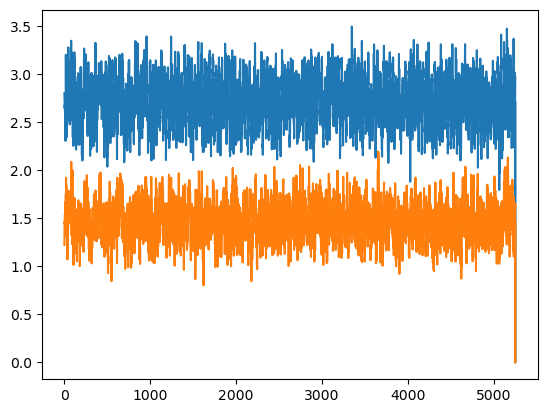

In [67]:
df["Uz1"].plot()
df["Uz2"].plot()

# Interesting different offsets, but a slight attack angle can cause that, boring
# Also let's cut off the last 2 points which are zeros

# Remove means and look at Uz1', Uz2' 

<Axes: >

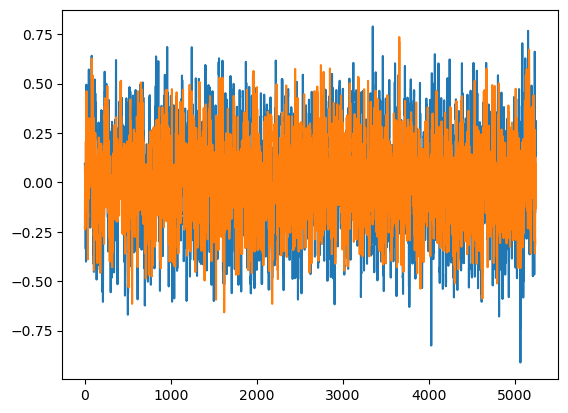

In [77]:
df = df[:-2]  # Last two points are zero, lop them off
df["Uz1'"].plot()
df["Uz2'"].plot()

# Uz1 with its bigger offset also has bigger range

<Axes: ylabel='Frequency'>

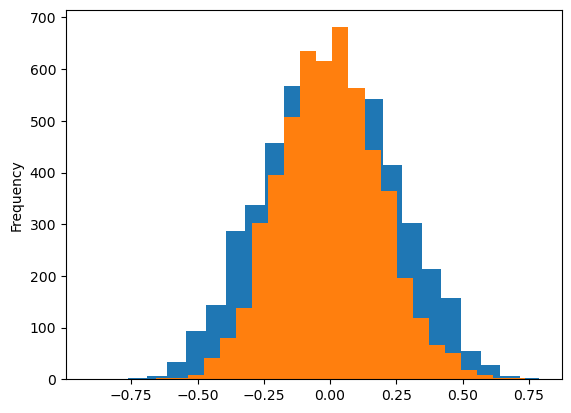

In [78]:
df["Uz1'"].plot.hist(bins=23)
df["Uz2'"].plot.hist(bins=23)

# Uz1 with its bigger offset also has bigger range

# How about at 1Hz? rolling(20) mean? 
### Result: still Uz1' has more variance, but at 2Hz they are equal

Text(0.5, 1.0, "Histograms of 1 Hz w' from channels 1 and 2")

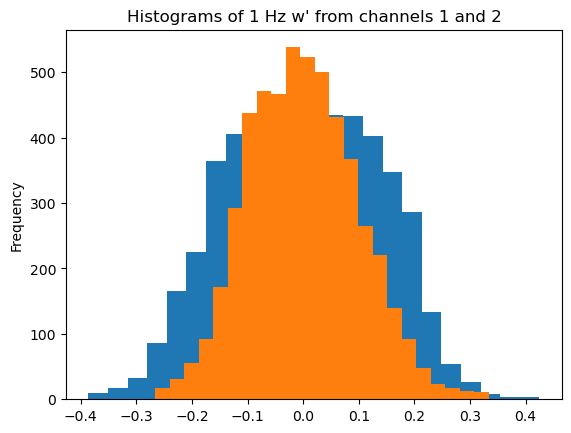

In [135]:
df["Uz1'"].rolling(20).mean().plot.hist(bins=23)
df["Uz2'"].rolling(20).mean().plot.hist(bins=23)
plt.title("Histograms of 1 Hz w' from channels 1 and 2")

Text(0.5, 1.0, "Histogram of two-second w' from channels 1 and 2")

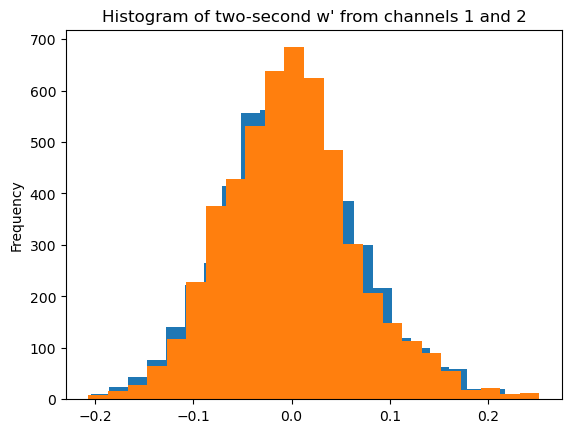

In [134]:
df["Uz1'"].rolling(40).mean().plot.hist(bins=23)
df["Uz2'"].rolling(40).mean().plot.hist(bins=23)
plt.title("Histogram of two-second w' from channels 1 and 2")

# Weird that 1s and 2s averages are so different ?!
## Let's look at lagged correlation structure

In [136]:
# Define function
def crosscorr(datax, datay, nlags=10):
    lags=[]
    vals=[]
    # Fill the values array
    for lag in range(-nlags,nlags,1):
        xcor = datax.corr(datay.shift(lag))
        lags.append( lag ) 
        vals.append( xcor ) 
    return(lags,vals)

Text(0.5, 1.0, "Lag correlation of Uz1', Uz2'")

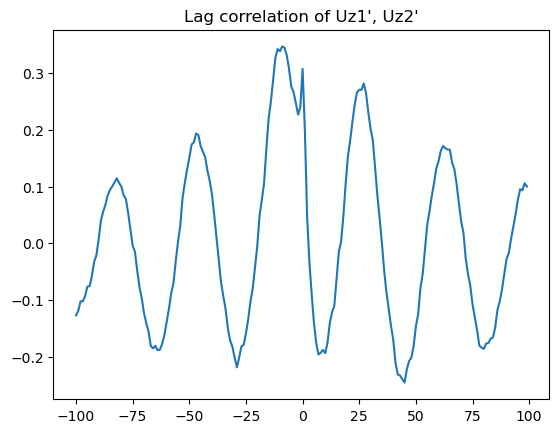

In [ ]:
lags,vals = crosscorr(df["Uz1'"], df["Uz2'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz1', Uz2'")

Text(0.5, 1.0, "Lag correlation of Uz1', Uz2'")

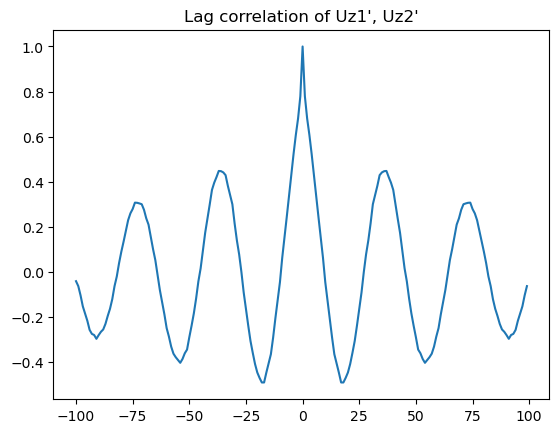

In [139]:
lags,vals = crosscorr(df["Uz1'"], df["Uz1'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz1', Uz1'")

Text(0.5, 1.0, "Lag correlation of Uz2', Uz2'")

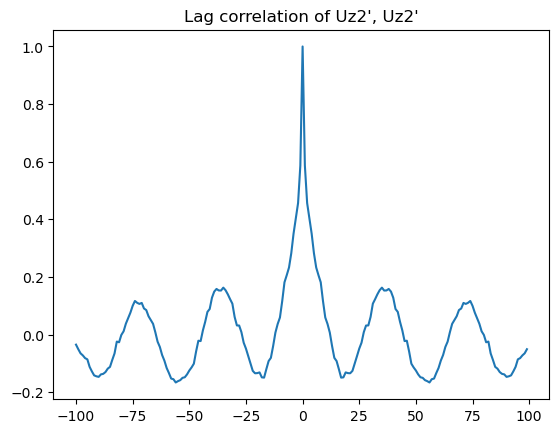

In [140]:
lags,vals = crosscorr(df["Uz2'"], df["Uz2'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz2', Uz2'")

# Define mean and difference 

In [69]:
wpmean=(df["Uz1'"]+df["Uz2'"])/2
wpdiff=(df["Uz1"]-df["Uz2"])/2

Text(0.5, 1.0, 'Lag correlation of meanw, meanw')

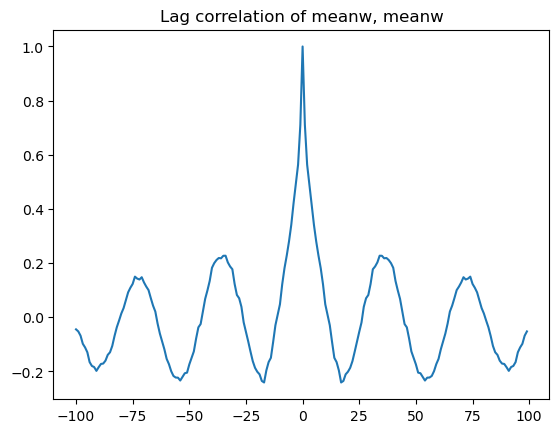

In [142]:
lags,vals = crosscorr(wpmean, wpmean, 100)
plt.plot(lags,vals)
plt.title("Lag correlation of meanw', meanw'")

Text(0.5, 1.0, 'Lag correlation of wpdiff, wpdiff')

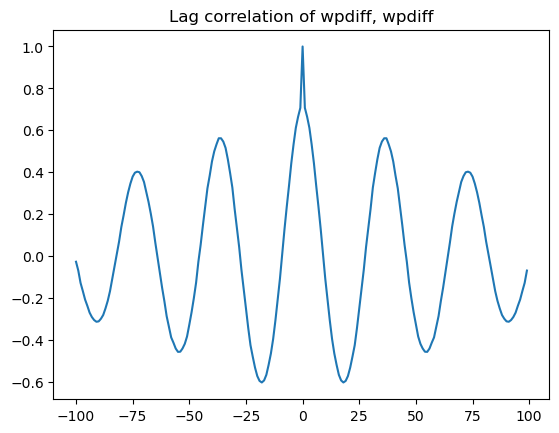

In [145]:
lags,vals = crosscorr(wpdiff, wpdiff, 100)
plt.plot(lags,vals)
plt.title("Lag correlation of wpdiff, wpdiff")

# But okay, let's rush ahead to a flux covariance
## w'T' for example

1      -0.299518
2      -0.186883
3      -0.229988
4      -0.049893
5      -0.073973
          ...   
5241    0.004907
5242    0.026462
5243    0.045167
5244   -0.076848
5245   -0.182568
Length: 5245, dtype: float64

Text(0.5, 1.0, "Lag correlation of meanw', meanT'. Value at 0 is flux")

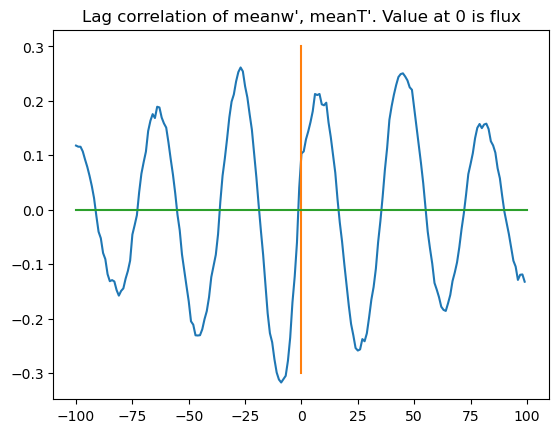

In [157]:
lags,vals = crosscorr(wpmean, (df["Ts1'"]+df["Ts2'"]/2), 100)
plt.plot(lags,vals)
plt.plot([0,0],[-0.3,0.3]); plt.plot([-100,100],[0,0])
plt.title("Lag correlation of meanw', meanT'. Value at 0 is flux")